---
# **Nemkovych Olha Fi-94**
---
#**Dataset from kaggle**: https://www.kaggle.com/datasets/mokar2001/ascvd-heart-risk





---



In [ ]:
import numpy as np
import pandas as pd
import sklearn.linear_model as skl
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from IPython.display import Markdown as md
import matplotlib.pylab as plt

In [ ]:
df = pd.read_csv('heart_risk.csv')
test_size = len(df)
df

,isMale,isBlack,isSmoker,isDiabetic,isHypertensive,Age,Systolic,Cholesterol,HDL,Risk
0,1,1,0,1,1,49,101,181,32,11.1
1,0,0,0,1,1,69,167,155,59,30.1
2,0,1,1,1,1,50,181,147,59,37.6
3,1,1,1,1,0,42,145,166,46,13.2
4,0,0,1,0,1,66,134,199,63,15.1
...,...,...,...,...,...,...,...,...,...,...
995,1,0,1,1,1,42,110,175,67,3.9
996,0,1,0,1,0,75,123,130,56,23.9
997,1,1,1,0,1,76,178,179,30,61.3
998,0,1,1,1,0,65,139,169,66,32.3


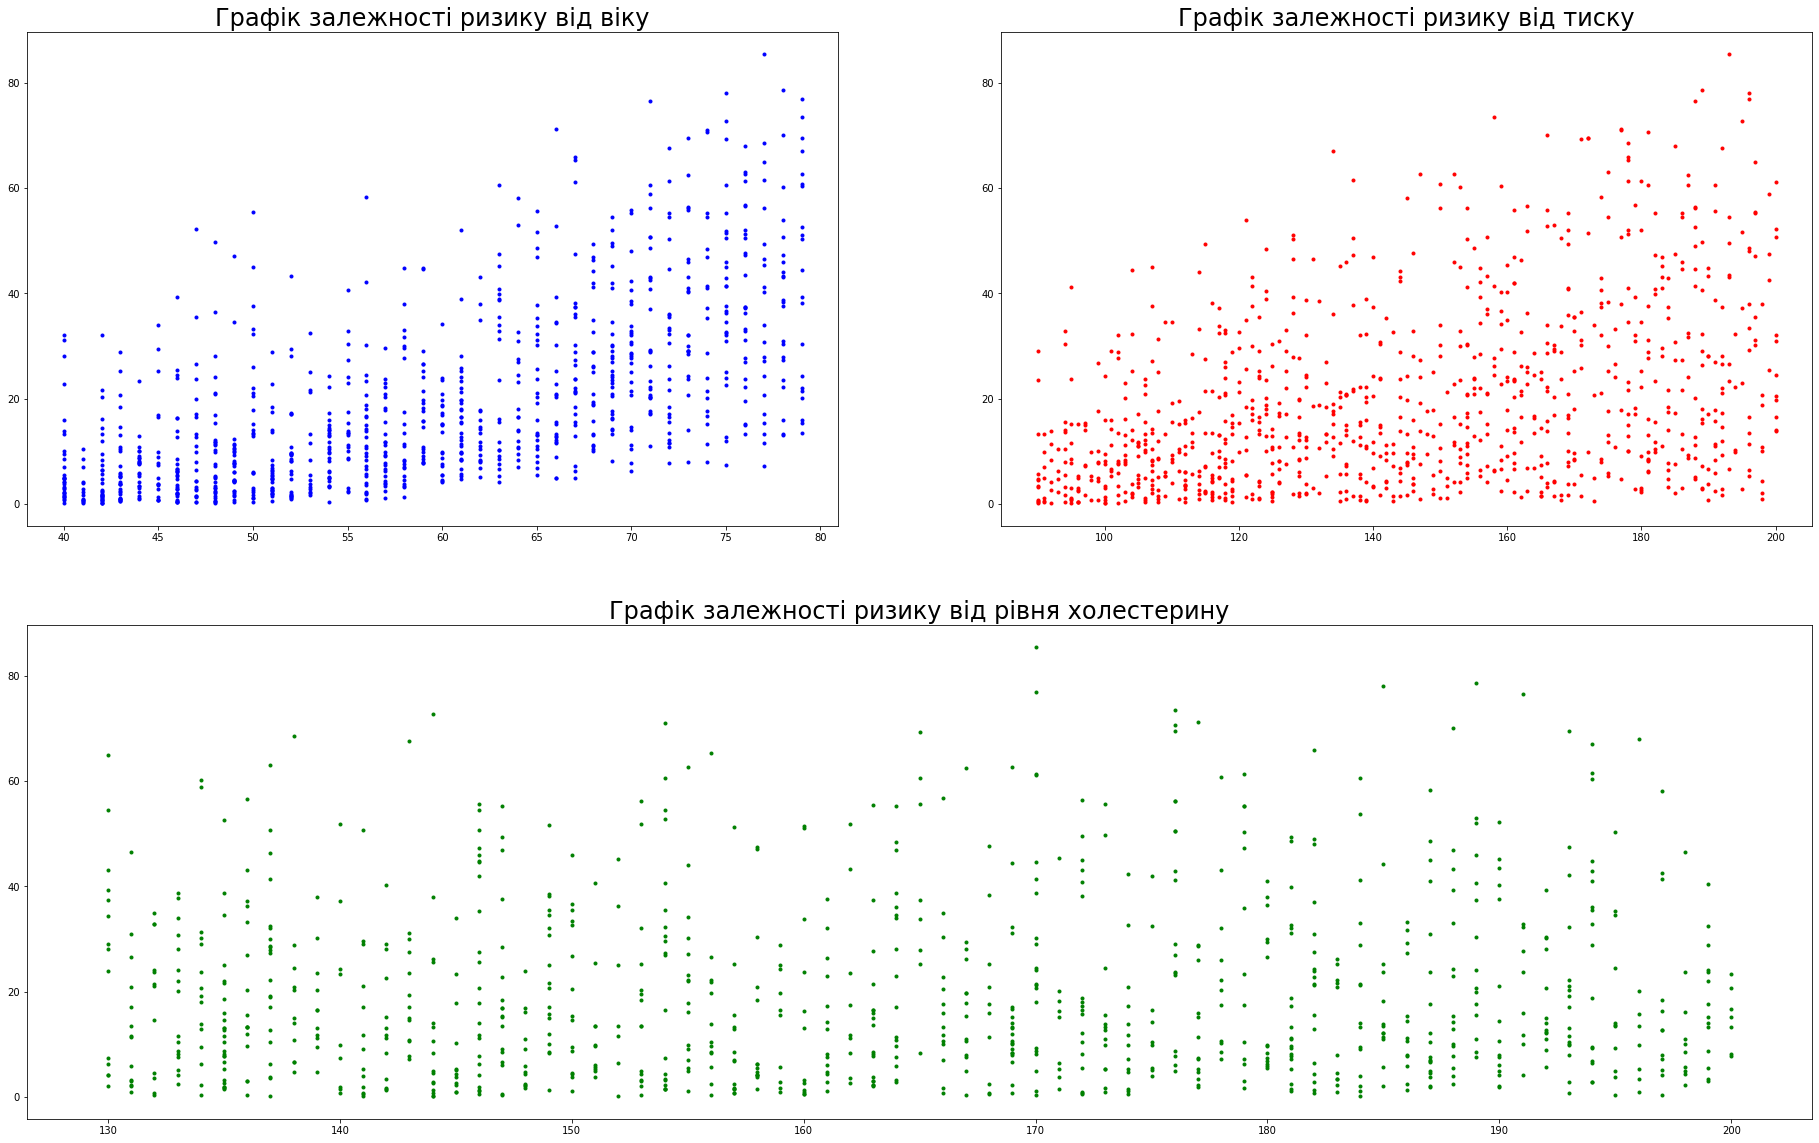

In [ ]:
figure = plt.figure(figsize = (32, 20))
age_axe = figure.add_subplot(2, 2, 1)
age_axe.set_title('Графік залежності ризику від віку', fontsize = 24)
systolic_axe = figure.add_subplot(2, 2, 2)
systolic_axe.set_title('Графік залежності ризику від тиску', fontsize = 24)
cholesterol_axe = figure.add_subplot(2, 2, (3, 4))
cholesterol_axe.set_title('Графік залежності ризику від рівня холестерину', fontsize = 24)
age_axe.plot(df.Age, df.Risk, '.', color = 'blue')
systolic_axe.plot(df.Systolic, df.Risk, '.', color = 'red')
cholesterol_axe.plot(df.Cholesterol, df.Risk, '.', color = 'green')


In [ ]:
age_teach = np.array(df.Age.head(test_size)).reshape(-1, 1)
systolic_teach = np.array(df.Systolic.head(test_size)).reshape(-1, 1)
risk_teach = np.array(df.Risk.head(test_size))
age_linear_regression = skl.LinearRegression().fit(age_teach, risk_teach)
systolic_linear_regression = skl.LinearRegression().fit(systolic_teach, risk_teach)
md("Age linear regression function: $y = {}x {}$ <br /> Systolic linear regression function: $y = {}x {}$"
.format(
age_linear_regression.coef_,
age_linear_regression.intercept_,
systolic_linear_regression.coef_,
systolic_linear_regression.intercept_
))

Age linear regression function: $y = [0.93965879]x -35.873411880909295$ <br /> Systolic linear regression function: $y = [0.21740633]x -11.693645883490898$

Coefficient of determination age linear regression model: 0.40452729396446807 <br /> Coefficient of determination systolic linear regression model: 0.16427161962014858

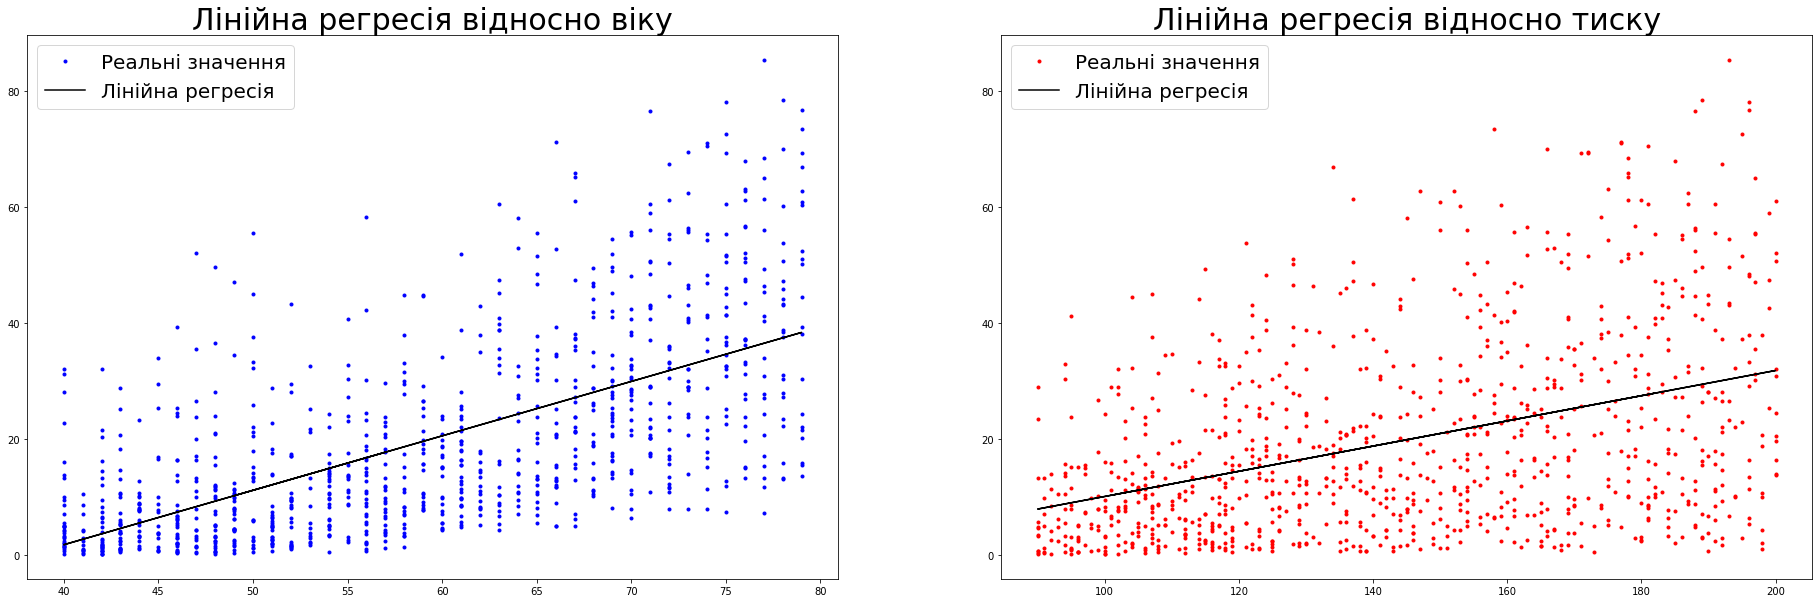

In [ ]:
age_test = np.array(df.Age.tail(test_size))
systolic_test = np.array(df.Systolic.tail(test_size))
risk_real = np.array(df.Risk.tail(test_size))
risk_age_predicted = age_linear_regression.predict(age_test.reshape(-1, 1))
risk_systolic_predicted = systolic_linear_regression.predict(systolic_test.reshape(-1, 1))
figure, [age_axe, systolic_axe] = plt.subplots(nrows = 1, ncols = 2,
figsize = (32, 10))
age_axe.set_title('Лінійна регресія відносно віку', fontsize = 30)
systolic_axe.set_title('Лінійна регресія відносно тиску', fontsize = 30)
age_axe.plot(age_test, risk_real, '.', color = 'blue', label = 'Реальні значення')
age_axe.plot(age_test, risk_age_predicted, '-', color = 'black', label = 'Лінійна регресія')
age_axe.legend(fontsize = 20)
systolic_axe.plot(systolic_test, risk_real, '.', color = 'red', label = 'Реальні значення')
systolic_axe.plot(systolic_test, risk_systolic_predicted, '-', color ='black', label = 'Лінійна регресія')
systolic_axe.legend(fontsize = 20)
md("Coefficient of determination age linear regression model: {} <br /> Coefficient of determination systolic linear regression model: {}"
.format(
age_linear_regression.score(age_test.reshape(-1, 1), risk_real),
systolic_linear_regression.score(systolic_test.reshape(-1, 1),
risk_real)
))

Coefficient of determination ridge regression model: 0.7995559945733763 <br /> Coefficient of determination lass regression model: 0.7175098379196225 <br /> Coefficient of determination elastic net regression model: 0.6740582253922596

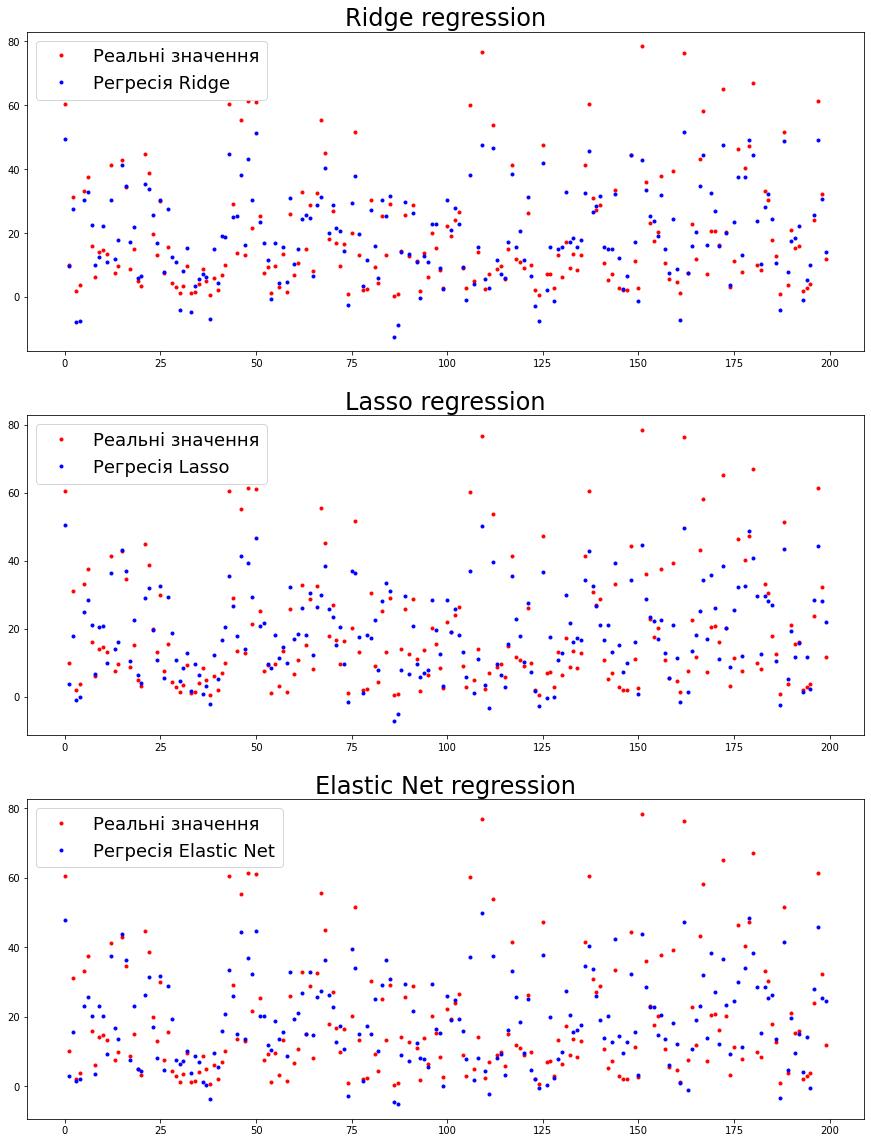

In [ ]:
data_teach = df.drop("Risk", axis = 1).head((test_size)//5)
data_test = df.drop("Risk", axis = 1).tail((test_size)//5)
risk_teach = df.Risk.head((test_size)//5)
risk_real = df.Risk.tail((test_size)//5)
ridge = skl.Ridge().fit(data_teach, risk_teach)
lasso = skl.Lasso().fit(data_teach, risk_teach)
elastic_net = skl.ElasticNet().fit(data_teach, risk_teach)
risk_ridge = ridge.predict(data_test)
risk_lasso = lasso.predict(data_test)
risk_elastic_net = elastic_net.predict(data_test)
figure, [ridge_axe, lasso_axe, elastic_net_axe] = plt.subplots(nrows = 3, ncols = 1, figsize = (15, 20))
ridge_axe.set_title('Ridge regression', fontsize = 24)
lasso_axe.set_title('Lasso regression', fontsize = 24)
elastic_net_axe.set_title('Elastic Net regression', fontsize = 24)
ridge_axe.plot(np.arange((test_size)//5), risk_real, 'r.', label = 'Реальні значення')
ridge_axe.plot(np.arange((test_size)//5), risk_ridge, 'b.', label ='Регресія Ridge')
ridge_axe.legend(fontsize = 18, loc = 'upper left')
lasso_axe.plot(np.arange((test_size)//5), risk_real, 'r.', label = 'Реальні значення')
lasso_axe.plot(np.arange((test_size)//5), risk_lasso, 'b.', label = 'Регресія Lasso')
lasso_axe.legend(fontsize = 18, loc = 'upper left')
elastic_net_axe.plot(np.arange((test_size)//5), risk_real, 'r.', label = 'Реальні значення')
elastic_net_axe.plot(np.arange((test_size)//5), risk_elastic_net, 'b.', label = 'Регресія Elastic Net')
elastic_net_axe.legend(fontsize = 18, loc = 'upper left')
md("Coefficient of determination ridge regression model: {} <br /> Coefficient of determination lass regression model: {} <br /> Coefficient of determination elastic net regression model: {}"
.format(
ridge.score(data_test, risk_real),
lasso.score(data_test, risk_real),
elastic_net.score(data_test, risk_real)
))

Coefficient of determination ridge regression model: 0.7504703066560385

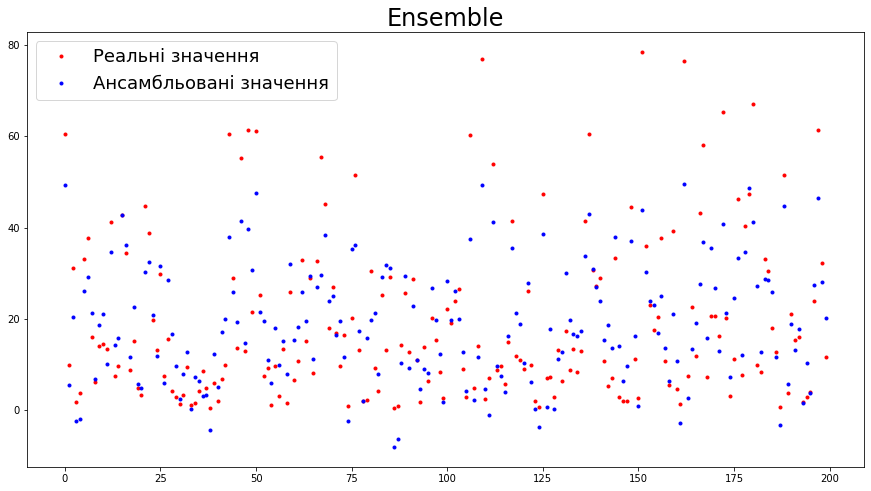

In [ ]:
ensemble = VotingRegressor([("r", ridge), ("l", lasso), ("en", elastic_net)]).fit(data_teach, risk_teach)
risk_ensemble = ensemble.predict(data_test)
figure, ensemble_axe = plt.subplots(figsize = (15, 8))
ensemble_axe.set_title('Ensemble', fontsize = 24)
ensemble_axe.plot(np.arange((test_size)//5), risk_real, 'r.', label = 'Реальні значення')
ensemble_axe.plot(np.arange((test_size)//5), risk_ensemble, 'b.', label = 'Ансамбльовані значення')
ensemble_axe.legend(fontsize = 18, loc = 'upper left')
md("Coefficient of determination ridge regression model: {}"
.format(
ensemble.score(data_test, risk_real)
))

(array([1., 0., 1., 0., 0., 0., 2., 0., 0., 3., 2., 1., 2., 1., 2., 2., 2.,
        1., 3., 4., 5., 0., 9., 8., 2., 5., 7., 7., 3., 5., 5., 9., 9., 5.,
        6., 2., 4., 4., 7., 3., 4., 4., 6., 5., 2., 7., 3., 5., 2., 2., 2.,
        1., 1., 0., 1., 2., 0., 0., 2., 1., 2., 0., 2., 2., 0., 0., 0., 1.,
        1., 0., 0., 0., 0., 0., 1., 1., 0., 2., 0., 0., 1., 0., 0., 2., 0.,
        1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([-18.50731274, -17.97465609, -17.44199945, -16.90934281,
        -16.37668617, -15.84402952, -15.31137288, -14.77871624,
        -14.24605959, -13.71340295, -13.18074631, -12.64808966,
        -12.11543302, -11.58277638, -11.05011973, -10.51746309,
         -9.98480645,  -9.4521498 ,  -8.91949316,  -8.38683652,
         -7.85417987,  -7.32152323,  -6.78886659,  -6.25620994,
         -5.7235533 ,  -5.19089666,  -4.65824001,  -4.12558337,
         -3.59292673,  -3.06027008,  -2.52761344,  -1.9949568 ,
         -1.46230016,  -0.92964351,  -

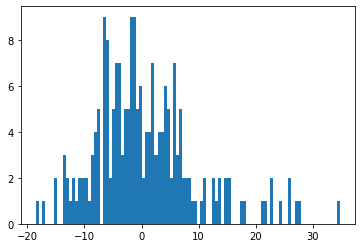

In [ ]:

plt.hist(risk_real - risk_ensemble, bins =100)